### Newsgroup Classification

#### In this notebook we will use a larger portion of the 20-Newsgroup data to perform text categorization. We will explore the use of several concepts including sparse matrices and pipleplines. We will also use parameter optimization to do model selection with Naive Bayes and Support Vector Machine classifiers.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
from sklearn.datasets import fetch_20newsgroups

news = fetch_20newsgroups(subset='all')

# We'll use only the first 3000 documents
n_samples = 3000

X = news.data[:n_samples]
y = news.target[:n_samples]

In [4]:
news.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
### Each document is a message posted on a newsgroup. Below is the text of the first two messages in the data.
# You want to classify them by topics.

X[:2]

["From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>\nSubject: Pens fans reactions\nOrganization: Post Office, Carnegie Mellon, Pittsburgh, PA\nLines: 12\nNNTP-Posting-Host: po4.andrew.cmu.edu\n\n\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n",
 'From: mblawson@midway.ecn.uoknor.edu (Matthew B Lawson)\nSubject: Which h

In [6]:
### Class labels for the newsgroups

print(set(y))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [8]:
### As part of preprocessing, we will remove the stop word

stopwords = pd.read_csv('stopwords_en.txt', header=None) # we get all the stop words
stopwords

,0
0,a
1,about
2,above
3,across
4,after
...,...
313,you
314,your
315,yours
316,yourself


In [9]:
stop_words = list(stopwords.values.ravel())

In [10]:
# TfidfVectorizer performs tokenization, removes stop words, and performs tfxidf transformation
# we are telling Tfidf that these are stop words.
# the token_pattern parameter is instructing TFIDF how to break down the texts into tokens like grandfather could be two tokens

tfidf = TfidfVectorizer(stop_words=stop_words, token_pattern=r"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b", norm=None)

In [11]:
X_tfidf = tfidf.fit_transform(X_train) # build the tfidf transformation.

In [12]:
X_tfidf.shape # you have 2400 actual news and 50884 features. It helps to have removed the stop words

(2400, 50884)

In [13]:
X_test_tfidf = tfidf.transform(X_test)

In [14]:
X_test_tfidf.shape

(600, 50884)

#### Note that the transformed data is stored in a sparse matrix (which is much more efficient for large data sets)

In [15]:
X_tfidf # this is a sparse matrix of type which stores all your vectors.

<2400x50884 sparse matrix of type '<class 'numpy.float64'>'
	with 240415 stored elements in Compressed Sparse Row format>

In [16]:
print(X_tfidf[:2])

  (0, 49332)	7.397346235101363
  (0, 43052)	5.564764771353053
  (0, 18167)	5.648146380292103
  (0, 7498)	8.090493415661307
  (0, 39007)	4.12968024606373
  (0, 4094)	4.178470410233162
  (0, 44717)	2.870137590582983
  (0, 23250)	3.820795965961346
  (0, 38015)	5.287133034754773
  (0, 35158)	4.609253326325616
  (0, 7542)	5.605586765873308
  (0, 30286)	5.287133034754773
  (0, 35471)	3.5632847711429285
  (0, 11875)	4.912439585313362
  (0, 23280)	3.3326021426555528
  (0, 7577)	3.5687048386122675
  (0, 5435)	4.832396877639826
  (0, 17725)	8.090493415661307
  (0, 28190)	5.73911815849783
  (0, 15253)	7.786582935998999
  (0, 3192)	8.090493415661307
  (0, 21073)	3.5741544433798325
  (0, 23657)	3.8636596703931283
  (0, 33982)	5.094761142107317
  (0, 43410)	6.075590395119043
  :	:
  (1, 29378)	3.8419981736119486
  (1, 20292)	8.090493415661307
  (1, 49558)	7.685028307553144
  (1, 43458)	16.180986831322613
  (1, 16773)	6.385745323422883
  (1, 38287)	3.7273947908729452
  (1, 13582)	6.218691238759717
  

In [17]:
# It's possible (though not usually necessary) to convert the matrix into a "dense" matrix

newX = X_tfidf.todense()

<p>Scikit leran knows what it is doing for efficiency so you will not need to do something like this.</p>

In [18]:
newX.shape

(2400, 50884)

In [19]:
np.set_printoptions(linewidth=120, edgeitems=12)
print(newX[:10])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [20]:
print(newX.sum(axis=1))

[[ 353.9656672 ]
 [ 615.80709319]
 [1509.21571478]
 [ 312.42228218]
 [ 497.40865428]
 [ 296.22891235]
 [ 394.92406169]
 [  79.0181996 ]
 [ 434.75655621]
 [ 604.78797848]
 [ 194.77220879]
 [ 649.8057449 ]
 ...
 [1081.70559415]
 [ 318.71902192]
 [ 458.42934382]
 [1428.55046974]
 [ 672.76200713]
 [1823.29391322]
 [ 372.98326499]
 [ 181.37967281]
 [ 436.71258582]
 [ 468.22025205]
 [ 468.7423809 ]
 [ 174.00737792]]


#### Fortunately, scikit-learn modules handle sparse matrices natively. So, the sparse matrices, such as X_tfidf above, an be directly passed to scikit-learn models. 



### Using Pipelines

#### Pipelines allow us to create machine learning workflows that combine different tasks. For example, preprocessing tasks can be combined with model creation. In the following examples, we'll use a pipeline to integrate the tokenization and TFIDF transformation preprocessing steps into our classification model. The full pipeline can then be used in training and evaluation of models.

In [21]:
### Lets' set up a pipeline to perform preprocessng of the newsgroup data and 
### classification of the documents using Multiomial Naive Bayes

clf = Pipeline([
    ('vect', TfidfVectorizer(
                stop_words=stop_words,
                token_pattern=r"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b",         
    )),
    ('nb', MultinomialNB(alpha=0.01)), # This is our classifier that we give alhpa  = 0.01
])

<p>So i you apply this classifier to the data, it is going to do both to the matrix.</p>

In [22]:
### We can use this function ot do cross-validation

from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import sem

def evaluate_cross_validation(clf, X, y, K):
    # create a k-fold cross validation iterator of K folds
    cv = KFold(n_splits=K, random_state=0, shuffle=True)
    # by default the score used is the one returned by score method of the estimator (accuracy)
    scores = cross_val_score(clf, X, y, cv=cv)
    print(scores)
    print("Mean score: %.3f (+/-%.3f)" % (np.mean(scores), sem(scores)))

<p> Evaluate is doing the Kfold cross validation which we initialize it with how many ks we want. Here we are just cross validating and getting the average score and get the error (standard deviation) using the sem method </p>

#### Note that the full pipeline is beign passed as the model to the cross-validation function

In [23]:
evaluate_cross_validation(clf, X_train, y_train, 5)

[0.80833333 0.81458333 0.81666667 0.79583333 0.8       ]
Mean score: 0.807 (+/-0.004)


<p>We got pretty close numbers by doing 5 folds.</p>

#### To optimize model parameters individually (in this case Naive Bayes smoothing parameter alpha), we can use our "calc_params' function used in earlier examples.

In [24]:
def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        print(param_name, ' = ', param_value)

        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        j = 0
        for train, test in cv.split(X):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit(X[train], y[train]) # fir the classifier with the training set and training labels
            k_train_scores[j] = clf.score(X[train], y[train])
            k_test_scores[j] = clf.score(X[test], y[test])
            
            # collect test scores and train scores for every single values in our param meter values
#             k_train_scores[j] = clf.score([X[k] for k in train], y[train])
#             k_test_scores[j] = clf.score([X[k] for k in test], y[test])
            j += 1
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
        print(param_name, '=', param_value, "Train =", train_scores[i], "Test =", test_scores[i])
       
    # plot the training and testing scores in a log scale
    # alpha is the transparency of the plot
    # lw is the width of the line.
    plt.semilogx(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.semilogx(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")  # we are plotting the accuracy of each parameter, 

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

<p>In the above function, we pass it X, our target, classifier, parameter values and parameter names because we are going to do our own Grid Search and for tuning how many K folds validation we would like to do. </p>

In [25]:
alphas = np.logspace(-7, 0, 10) # this is telling us how we are going to space the alphas
print(alphas)

[1.00000000e-07 5.99484250e-07 3.59381366e-06 2.15443469e-05 1.29154967e-04 7.74263683e-04 4.64158883e-03
 2.78255940e-02 1.66810054e-01 1.00000000e+00]


nb__alpha  =  1e-07
nb__alpha = 1e-07 Train = 1.0 Test = 0.7670833333333332
nb__alpha  =  5.994842503189409e-07
nb__alpha = 5.994842503189409e-07 Train = 1.0 Test = 0.7708333333333334
nb__alpha  =  3.5938136638046257e-06
nb__alpha = 3.5938136638046257e-06 Train = 1.0 Test = 0.77625
nb__alpha  =  2.1544346900318867e-05
nb__alpha = 2.1544346900318867e-05 Train = 1.0 Test = 0.7845833333333334
nb__alpha  =  0.0001291549665014884
nb__alpha = 0.0001291549665014884 Train = 1.0 Test = 0.7908333333333333
nb__alpha  =  0.000774263682681127
nb__alpha = 0.000774263682681127 Train = 1.0 Test = 0.7987500000000001
nb__alpha  =  0.004641588833612782
nb__alpha = 0.004641588833612782 Train = 1.0 Test = 0.8066666666666666
nb__alpha  =  0.02782559402207126
nb__alpha = 0.02782559402207126 Train = 0.9992708333333333 Test = 0.8016666666666665
nb__alpha  =  0.1668100537200059
nb__alpha = 0.1668100537200059 Train = 0.9945833333333335 Test = 0.7858333333333333
nb__alpha  =  1.0
nb__alpha = 1.0 Train = 0.9701041

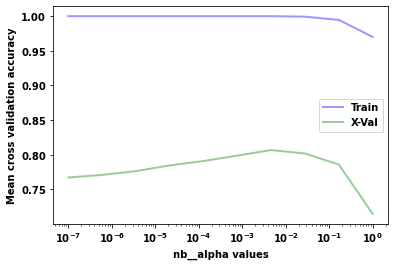

In [26]:
train_scores, test_scores = calc_params(X_train, y_train, clf, alphas, 'nb__alpha', 5)

<p>Training is expected to be higher (from left to right)and testing is low, moving from right to left so we would like to be around 10 ^-2.</p>

In [27]:
print('training scores: ', train_scores)
print('testing scores: ', test_scores)

training scores:  [1.         1.         1.         1.         1.         1.         1.         0.99927083 0.99458333 0.97010417]
testing scores:  [0.76708333 0.77083333 0.77625    0.78458333 0.79083333 0.79875    0.80666667 0.80166667 0.78583333 0.71458333]


#### These results suggest that the optimum value of alpha is roughly between 0.03 and 0.05.

In [28]:
### Let's use alpha = 0.04 for the final model

mnb = MultinomialNB(alpha=0.04)

In [29]:
mnb.fit(X_tfidf, y_train)

MultinomialNB(alpha=0.04)

In [30]:
### Performance on the test data
mnb_pred = mnb.predict(X_test_tfidf)
print(mnb_pred)

[15 14  3 19  6 19  3 13  1 19  0 12  8  4 12  3 11 11 18  4 12 12 18 12  5 10  5 12  4  3  1 13  9 15 12 17  7  8 12
 12  1  3 18 11  3  3  6  5 17  8 10 18 19 10  9 12  1 12 16  5  7 13 18  3 10 14  8  7  7 12  4  3 18 12  5 13 15 18
 15 14 16  9 16 14 11  9 15  4  3 14 14  8  9 17 15  4 11 12  7  9  4 17 17 12  1  4 11  6 13  0  1  5 12 13  6  6 11
 18 13 12 17  3  8 12 19 14  0 10  5 14 14  9 12  4 12 11  4  9  7 12 11  9  7 16 16 14 12  9 15  8  9 18  7 18  5 10
 15  8  1  5 17 12  3  7  4 16 11  4  6 12 11 13 18  5  8 15  3 15  5 15  3 19 14  5 10  2  7 13  4 13 17  6  8 12 14
 14 14 15 12  3  5 17 18 19  4  3 16  9  1  7 15 10 13 10  3 10  9 15 17 14 14  1  3  8 11 18 16  4 15  5 13  5  0 16
 14 10  7  3 11  6  0  4  6 15 18  2  4 14  5  5 10 15  3 17  8 18  8  7  6 19 10  4 10  8 18  1  8 15 11 12 11  3 18
 11 11 18 11  0 12  8 13 11  0  0 12 19 16 13  1 13  3 17 11  5 12  0  0 12  7  2 15  3 13  3 15  6  4 11  5 10 15 16
 16 17  3 18 16  8 17  4  2  4 16 17 16  5 15  2  7 14  

In [31]:
from sklearn.metrics import classification_report
print(classification_report(mnb_pred, y_test,
                            target_names=news.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.85      0.92      0.88        25
           comp.graphics       0.69      0.83      0.76        30
 comp.os.ms-windows.misc       0.26      1.00      0.41        10
comp.sys.ibm.pc.hardware       0.67      0.49      0.56        41
   comp.sys.mac.hardware       0.77      0.56      0.65        41
          comp.windows.x       0.81      0.68      0.74        38
            misc.forsale       0.55      0.74      0.63        23
               rec.autos       0.81      0.77      0.79        22
         rec.motorcycles       0.86      0.94      0.90        32
      rec.sport.baseball       0.96      0.93      0.95        28
        rec.sport.hockey       1.00      0.94      0.97        33
               sci.crypt       0.83      0.76      0.79        33
         sci.electronics       0.79      0.72      0.76        47
                 sci.med       0.88      0.88      0.88        25
         

### Let's now try Support Vector Machines for classification

In [32]:
from sklearn.svm import SVC

### Let's again create a pipeline, this time with a linear SVM

clf = Pipeline([
    ('vect', TfidfVectorizer(
                stop_words=stop_words,
                token_pattern=r"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b",         
    )),
    ('svc', SVC(kernel='linear')),
])

In [33]:
evaluate_cross_validation(clf, X_train, y_train, 5)

[0.79791667 0.80208333 0.83125    0.79583333 0.80208333]
Mean score: 0.806 (+/-0.006)


#### We can try different values of regulariztion parameter C for a better fit

svc__C  =  1
svc__C = 1 Train = 0.9971874999999999 Test = 0.8058333333333334
svc__C  =  5
svc__C = 5 Train = 1.0 Test = 0.8150000000000001
svc__C  =  10
svc__C = 10 Train = 1.0 Test = 0.8150000000000001
svc__C  =  50
svc__C = 50 Train = 1.0 Test = 0.8150000000000001
svc__C  =  100
svc__C = 100 Train = 1.0 Test = 0.8150000000000001


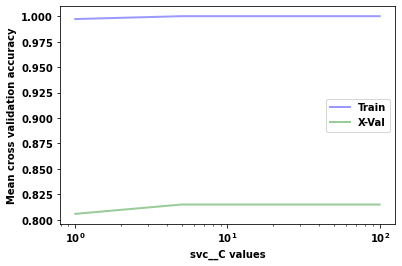

In [34]:
c_vals = [1, 5, 10, 50, 100]

train_scores, test_scores = calc_params(X_train, y_train, clf, c_vals, 'svc__C', 5)

#### It seems that we can obtain a slight improvement with a higher (than the default 1.0) value of C, but not much change occurs beyond C = 10.0)

#### Let's try to do a more systemtic grid search, this time using a Radial Basis Funtion (RBF) kernel. We'll explore the parameter space for teh same values of C as above, as well as for the values of the gamma parameter used to control the width of the RBF function (this is generally a very small value).

In [35]:
from sklearn.model_selection import GridSearchCV

 # here we are varying both gamma and C at the same time.
# we assign different ranges
parameters = {
    'svc__gamma': np.logspace(-3, 0, 4),
    'svc__C': [1, 5, 10, 50, 100],
}                                           

clf = Pipeline([
    ('vect', TfidfVectorizer(
                stop_words=stop_words,
                token_pattern=r"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b",         
    )),
    ('svc', SVC(kernel='rbf')),
])

gs = GridSearchCV(clf, parameters, verbose=2, cv=3) # here were doing Grid Search for multiple parameters
# we are tuning the classifier with the combination of the two parameters and each combination is going to be cross validated 3 times.

In [36]:
%time _ = gs.fit(X, y)

gs.best_params_, gs.best_score_

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END .........................svc__C=1, svc__gamma=0.001; total time=  19.5s
[CV] END .........................svc__C=1, svc__gamma=0.001; total time=  13.3s
[CV] END .........................svc__C=1, svc__gamma=0.001; total time=  20.0s
[CV] END ..........................svc__C=1, svc__gamma=0.01; total time=  14.7s
[CV] END ..........................svc__C=1, svc__gamma=0.01; total time=  12.2s
[CV] END ..........................svc__C=1, svc__gamma=0.01; total time=  12.0s
[CV] END ...........................svc__C=1, svc__gamma=0.1; total time=  13.1s
[CV] END ...........................svc__C=1, svc__gamma=0.1; total time=  12.9s
[CV] END ...........................svc__C=1, svc__gamma=0.1; total time=  13.2s
[CV] END ...........................svc__C=1, svc__gamma=1.0; total time=  12.5s
[CV] END ...........................svc__C=1, svc__gamma=1.0; total time=  12.6s
[CV] END ...........................svc__C=1, sv

({'svc__C': 100, 'svc__gamma': 0.01}, 0.8276666666666667)

#### With the grid search we obtained a better combination of C and gamma parameters, with values 100.0 and 0.01 respectively, and we obtained a 3-fold cross validation accuracy of 0.829, better than the accuracy obtained (0.807) wiht the linear kernel and the default value of C (1.0).

#### Let's train the final model with these parameters on the full training data and evaluate it on the test set.

In [37]:
clf = Pipeline([
    ('vect', TfidfVectorizer(
                stop_words=stop_words,
                token_pattern=r"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b",         
    )),
    ('svc', SVC(kernel='rbf', C=100, gamma=0.01)),
])

In [38]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(stop_words=['a', 'about', 'above', 'across',
                                             'after', 'afterwards', 'again',
                                             'against', 'all', 'almost',
                                             'alone', 'along', 'already',
                                             'also', 'although', 'always', 'am',
                                             'among', 'amongst', 'amoungst',
                                             'amount', 'an', 'and', 'another',
                                             'any', 'anyhow', 'anyone',
                                             'anything', 'anyway', 'anywhere', ...],
                                 token_pattern='\\b[a-z0-9_\\-\\.]+[a-z][a-z0-9_\\-\\.]+\\b')),
                ('svc', SVC(C=100, gamma=0.01))])

In [39]:
svc_pred = clf.predict(X_test)

In [40]:
print(clf.score(X_test, y_test))

0.8433333333333334


In [41]:
print(classification_report(svc_pred, y_test, target_names=news.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.85      0.92      0.88        25
           comp.graphics       0.89      0.78      0.83        41
 comp.os.ms-windows.misc       0.85      0.85      0.85        39
comp.sys.ibm.pc.hardware       0.60      0.82      0.69        22
   comp.sys.mac.hardware       0.90      0.77      0.83        35
          comp.windows.x       0.88      0.82      0.85        34
            misc.forsale       0.77      0.92      0.84        26
               rec.autos       0.76      0.73      0.74        22
         rec.motorcycles       0.91      0.91      0.91        35
      rec.sport.baseball       0.81      0.96      0.88        23
        rec.sport.hockey       0.97      0.94      0.95        32
               sci.crypt       0.80      0.96      0.87        25
         sci.electronics       0.84      0.77      0.80        47
                 sci.med       0.92      0.74      0.82        31
         

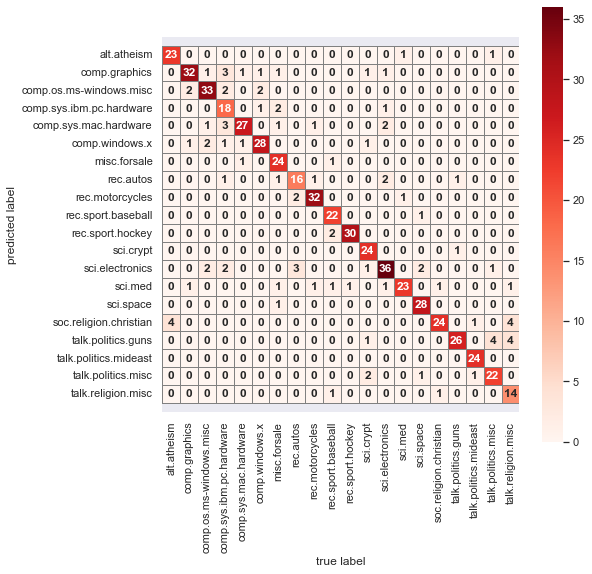

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, svc_pred)
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(mat.T, square=True, linecolor='grey', linewidths=1, annot=True, 
            fmt='d', cbar=True, cmap='Reds', ax=ax, annot_kws={"fontsize":12, "weight":"bold"},
            xticklabels=news.target_names,
            yticklabels=news.target_names)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [43]:
## From the Video

In [44]:
clf = Pipeline([
    ('vect', TfidfVectorizer(
                stop_words=stop_words,
                token_pattern=r"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b",         
    )),
    ('svc', SVC()),
])

svc__C  =  1
svc__C = 1 Train = 0.9992708333333333 Test = 0.7433333333333334
svc__C  =  5
svc__C = 5 Train = 1.0 Test = 0.7837500000000001
svc__C  =  10
svc__C = 10 Train = 1.0 Test = 0.7837500000000001
svc__C  =  50
svc__C = 50 Train = 1.0 Test = 0.7837500000000001
svc__C  =  100
svc__C = 100 Train = 1.0 Test = 0.7837500000000001


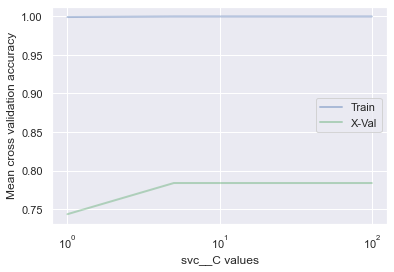

In [45]:
gammas = np.logspace(-2, 1, 4)
train_scores, test_scores = calc_params(X_train, y_train, clf, c_vals, 'svc__C', 5)


<p>We have underfitting on the left and overfitting on the right because the training line looks perfect and the testing one goes down. </p>

In [46]:
print('training scores: ', train_scores)
print('testing scores: ', test_scores)

training scores:  [0.99927083 1.         1.         1.         1.        ]
testing scores:  [0.74333333 0.78375    0.78375    0.78375    0.78375   ]


<p>For gamma < 1 we have underfitting. For gamma > 1 we have overfitting. So here, the best results is for gamma = 1 where we obtain a training accuracy of 0.999 and a testing accuracy of 0.75.<p>

In [47]:
from sklearn.model_selection import GridSearchCV

 # here we are varying both gamma and C at the same time.
# we assign different ranges
parameters = {
    'svc__gamma': np.logspace(-2, 1, 4),
    'svc__C': np.logspace(-1, 1, 3),
}                                           

clf = Pipeline([
    ('vect', TfidfVectorizer(
                stop_words=stop_words,
                token_pattern=r"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b",         
    )),
    ('svc', SVC()),
])

gs = GridSearchCV(clf, parameters, verbose=2, cv=3) # here were doing Grid Search for multiple parameters
# we are tuning the classifier with the combination of the two parameters and each combination is going to be cross validated 3 times.

In [48]:
%time _ = gs.fit(X, Y)
gs.best_params, gs.best_score_

NameError: name 'Y' is not defined

AttributeError: 'GridSearchCV' object has no attribute 'best_params'

<p>With the grid serach we obtained a better combination of C and gamma parameters, for values 10.0 and 0.10 respectively, we obtained a 3-fold cross validation accuracy of 0.828 much better than the best value we obtained (0.76) in the previous experiment by only adjusting and keeping C value at 1.0.</p>